# Explore here

In [109]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [110]:

df = pd.read_csv('/workspaces//pauline---Ejercicio-y-Tutorial-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv', sep= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [111]:
#Queremos conocer dimensión del DF:
df.shape

(41188, 21)

In [112]:
#Tipo de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No hay ningun NaN.

In [113]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [114]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())

12

In [115]:
#Hay 12, entonces buscamos cuales son : 

df[df.duplicated()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.80,93.08,-47.10,1.42,5099.10,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no


In [116]:
#Y doble chequeo, para imprimirlas todas, para estar seguros que son exactamente iguales:
print(df[df.duplicated(keep=False)])

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [117]:
#Las borramos : 
df.drop(df[df.duplicated() == True].index, axis=0, inplace=True)

# Revisamos ue se hayan eleminadas, y que solo se ha quitado 12 líneas y no 24 :
print(sum(df.duplicated()))
print(df.shape)



0
(41176, 21)


In [118]:
# La meta = identificar a los clientes existentes que tienen una mayor probabilidad de contratar un un prestamo
# Eliminamos columnas que no son relevantes o útiles o para el objectivo : 

# En ese caso : 
# Contact: Vemos que solo hay 2 datos unicos, buscamos cuales son y el %: 
print(df['contact'].value_counts())

# Telephone y cellular son sinonimos, el metodo de contacto es el mismo entonces no es relevante para el objectivo, borramos :
df.drop(['contact'], axis=1, inplace=True)


#Nos queda esas columnas: 
print(df.columns.str.strip())
print(df.shape)



contact
cellular     26135
telephone    15041
Name: count, dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41176, 20)


In [119]:
#Descripción básica :
df.describe().T.round(1)


,count,mean,std,min,25%,50%,75%,max
age,41176.00,40.00,10.40,17.00,32.00,38.00,47.00,98.00
duration,41176.00,258.30,259.30,0.00,102.00,180.00,319.00,4918.00
campaign,41176.00,2.60,2.80,1.00,1.00,2.00,3.00,56.00
pdays,41176.00,962.50,186.90,0.00,999.00,999.00,999.00,999.00
previous,41176.00,0.20,0.50,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41176.00,0.10,1.60,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41176.00,93.60,0.60,92.20,93.10,93.70,94.00,94.80
cons.conf.idx,41176.00,-40.50,4.60,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41176.00,3.60,1.70,0.60,1.30,4.90,5.00,5.00
nr.employed,41176.00,5167.00,72.30,4963.60,5099.10,5191.00,5228.10,5228.10


In [120]:
# Revisamos los valores faltantes:
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

Análisis de variables univariante

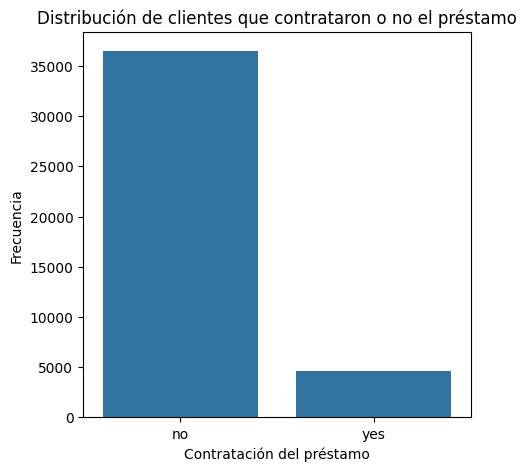

y
no    88.73
yes   11.27
Name: proportion, dtype: float64


In [121]:
# Visualizamos primero la distribución y % de y, el objectivo:

plt.figure(figsize=(5, 5))
sns.countplot(x='y', data=df)
plt.title('Distribución de clientes que contrataron o no el préstamo')
plt.xlabel('Contratación del préstamo')
plt.ylabel('Frecuencia')

plt.show()
print(df['y'].value_counts(normalize=True) * 100)

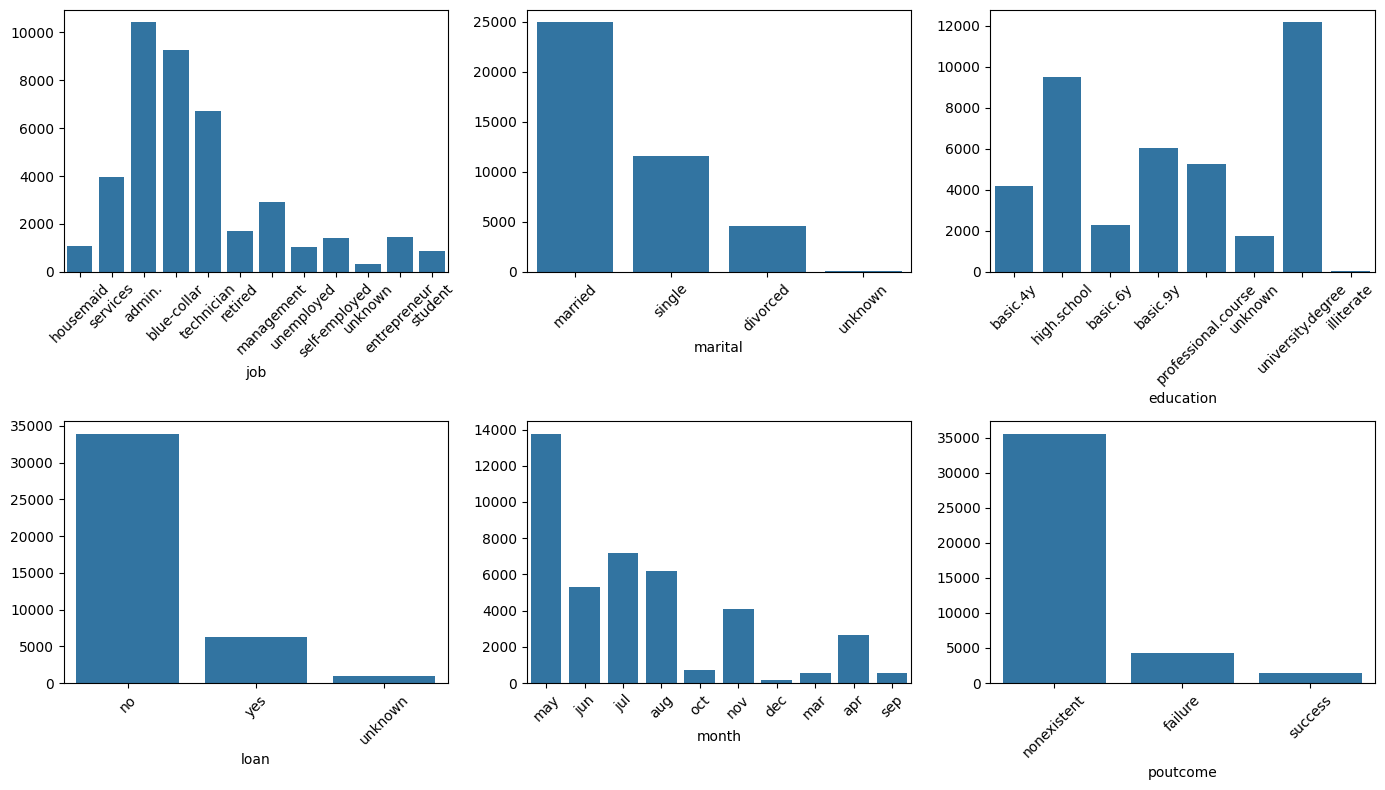

In [122]:
# Variables categóricas:
fig, axis = plt.subplots(2, 3, figsize=(14, 8))
sns.countplot(ax=axis[0, 0], data=df, x="job").set_ylabel(None)
sns.countplot(ax=axis[0, 1], data=df, x="marital").set_ylabel(None)
sns.countplot(ax=axis[0, 2], data=df, x="education").set_ylabel(None)
sns.countplot(ax=axis[1, 0], data=df, x="loan").set_ylabel(None)
sns.countplot(ax=axis[1, 1], data=df, x="month").set_ylabel(None)
sns.countplot(ax=axis[1, 2], data=df, x="poutcome").set_ylabel(None)

# Ajustar las etiquetas :
for x in axis.flatten():
    for label in x.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(10)  

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


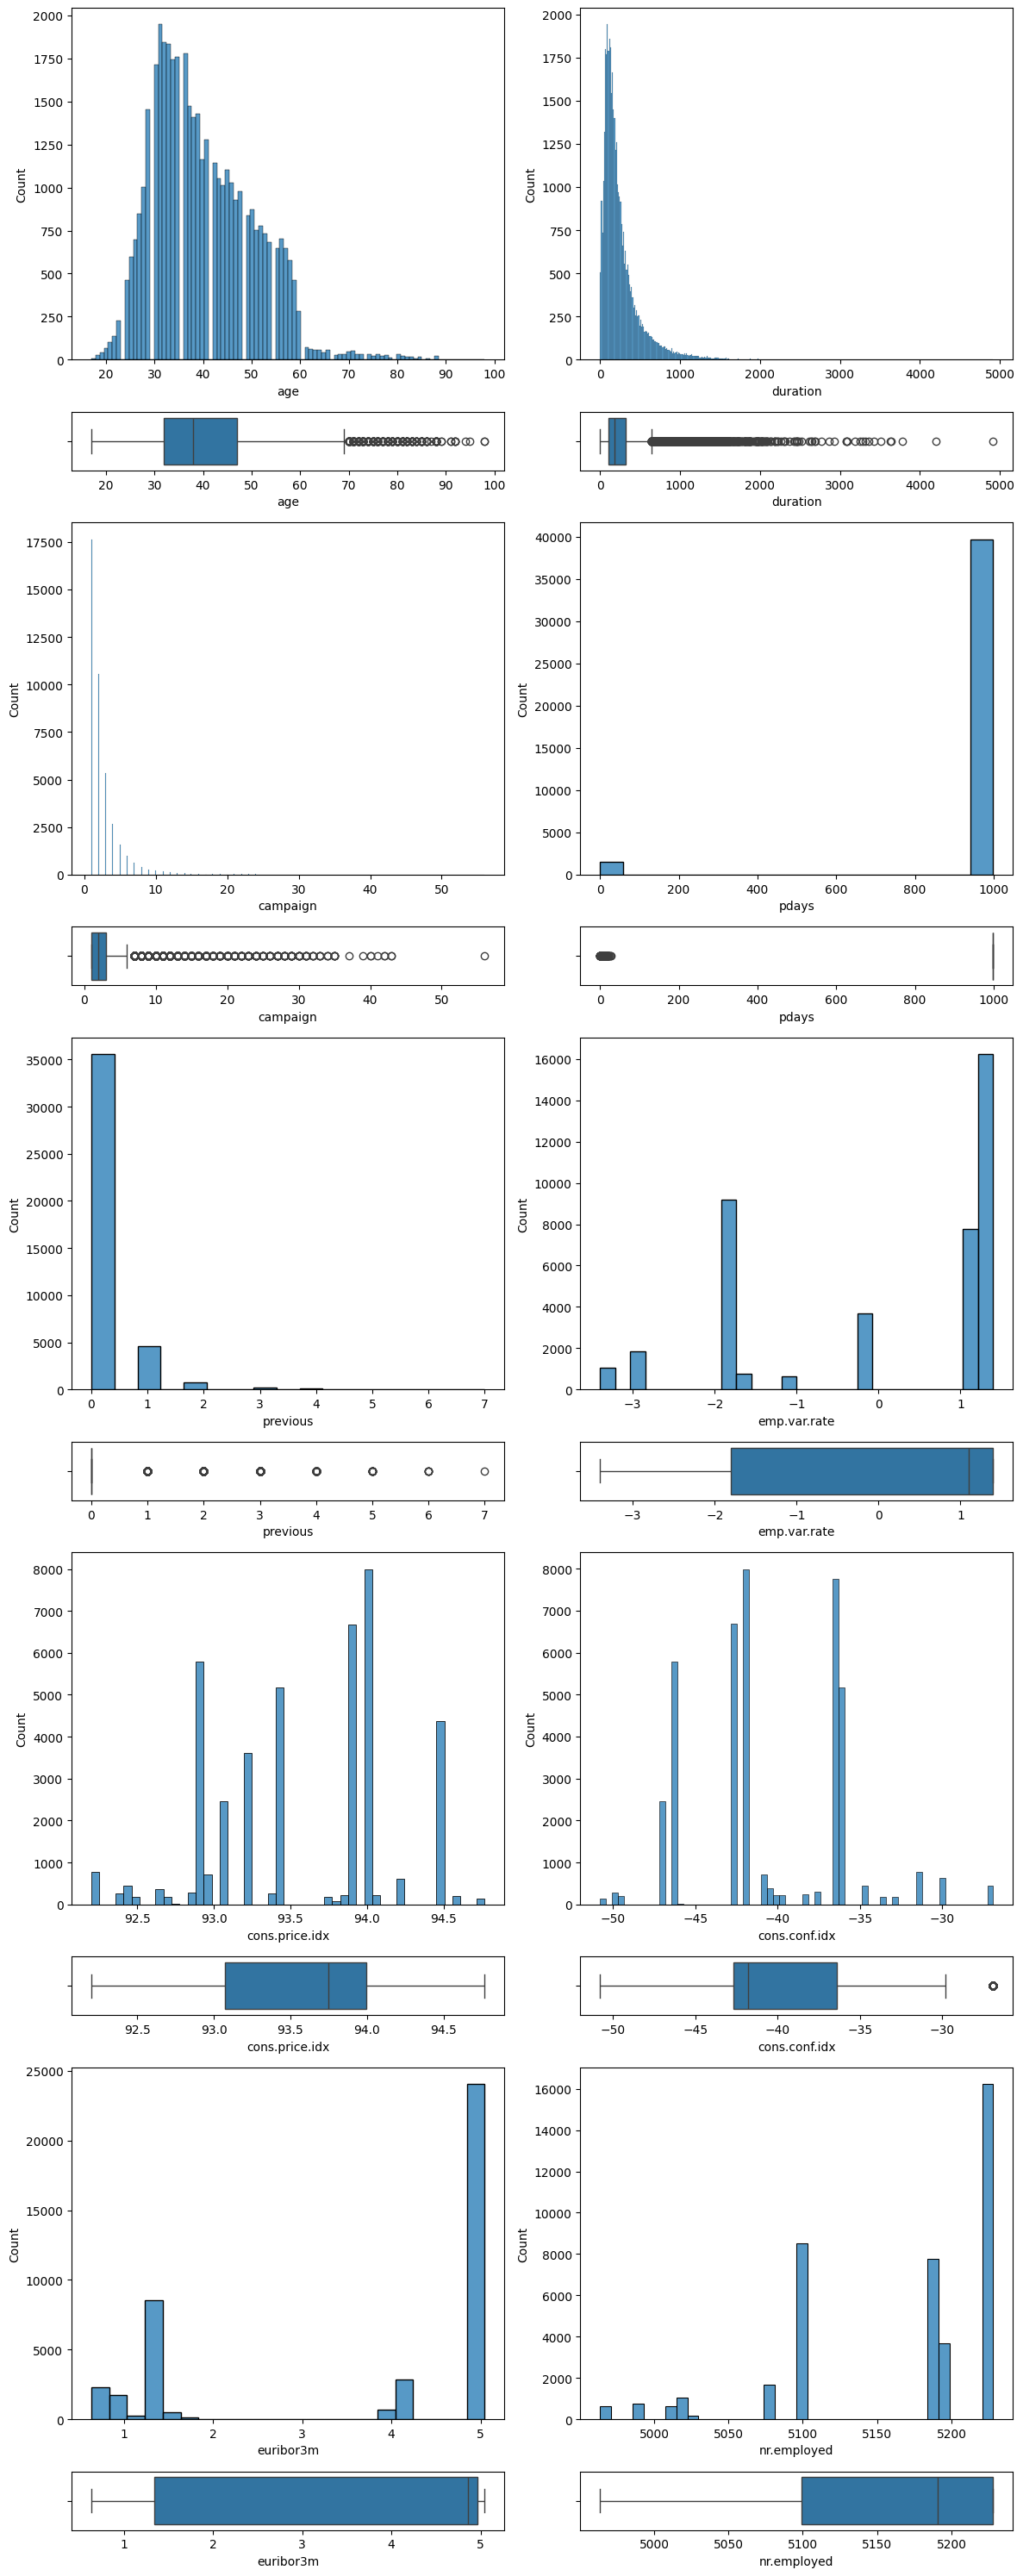

In [123]:
# Variables numéricas:

fig, axis = plt.subplots(10, 2, figsize=(12, 30), gridspec_kw={"height_ratios": [6, 1] * 5})


sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")

sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[3, 0], data=df, x="campaign")

sns.histplot(ax=axis[2, 1], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")


sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[5, 0], data=df, x="previous")

sns.histplot(ax=axis[4, 1], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[7, 0], data=df, x="cons.price.idx")

sns.histplot(ax=axis[6, 1], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")

sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[9, 0], data=df, x="euribor3m")

sns.histplot(ax=axis[8, 1], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")


plt.tight_layout()


plt.show()



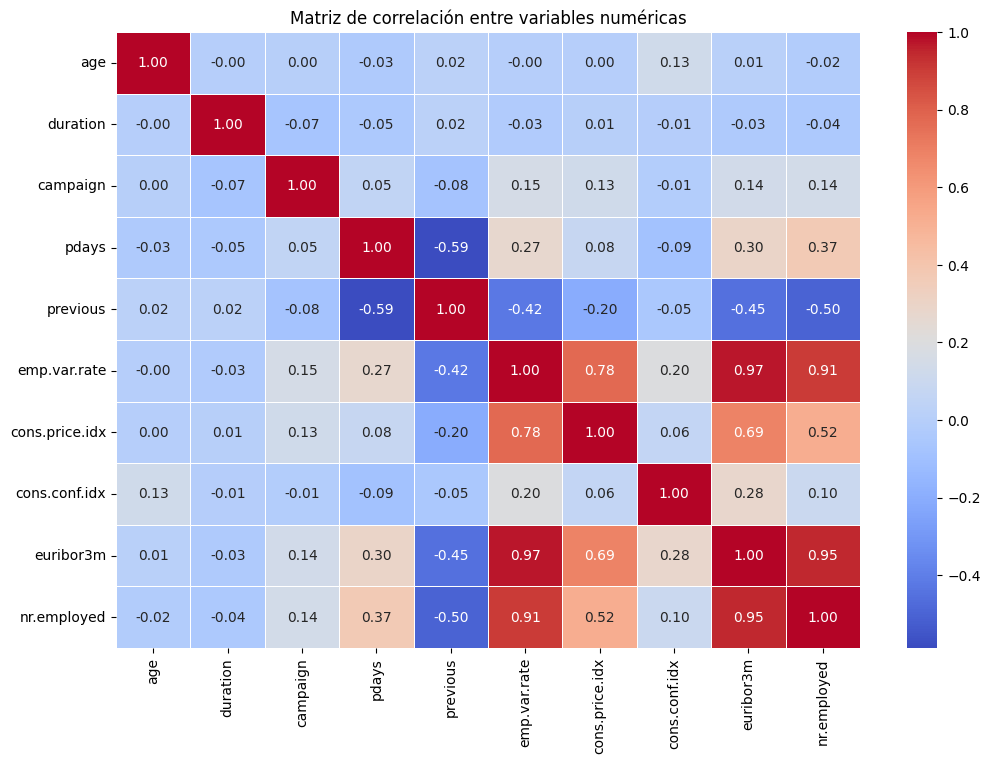

In [124]:
# Matriz de correlación de variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [ ]:
#Definimos X e Y para dividir el data set entre set y train
X = df.drop(['y'], axis=1) 
y = df['y'] 

# Convertir las etiquetas 'yes'/'no' en valores numéricos (1, 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
#Importancia de caracteristicas: vamos a medir que tan importante son las variables 
# Crear un transformador de columnas para las variables categóricas
categorical_columns = X.select_dtypes(include=['object']).columns  # Seleccionar columnas categóricas

# Usar LabelEncoder en las columnas categóricas
transformer = ColumnTransformer(
    transformers=[('cat', LabelEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Crear un pipeline para aplicar el preprocesamiento y luego el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),  # Transformación de datos
    ('classifier', XGBClassifier())  # Modelo de clasificación XGBoost
])

# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Obtener la importancia de las características
xgb_model = pipeline.named_steps['classifier']
feature_importances = xgb_model.feature_importances_

# Visualizar la importancia de las características en un gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características con XGBoost')
plt.show()

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given